In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

## Creación del grafo

In [9]:
mip = pd.read_csv(r'../resources/MIP  - Hoja 1 (2).csv', index_col=0)
valores_intermedios = pd.read_csv(r'../resources/Valores intermedios.csv')

columnas = mip.columns
for col in columnas:
  mip[col] = mip[col].astype(float)
  
  # Armo la matriz de coeficientes técnicos.
for i in range(mip.shape[0]):
  for j in range(mip.shape[0]):
    if valores_intermedios.iloc[j,0] != 0:
      mip.iloc[i, j] = mip.iloc[i, j] / valores_intermedios.iloc[j,0]
    else:
      mip.iloc[i,j] = 0

# Drop de sectores que no tienen relación con otros sectores (Hay 3)
for i, col in enumerate(columnas):
    if (mip[col] == 0).all():
        mip = mip.drop(labels=col, axis=0)
        mip = mip.drop(labels=col, axis=1)
        valores_intermedios.drop(i, inplace=True)

red_sectores = mip.copy()
red_sectores.to_csv('resources')



## Cargamos el grafo

In [10]:
#red_sectores = pd.read_csv(r'C:\Users\shepe\Documents\GitHub\tp-msscae-2024\resources\red_sectores.csv')
red_sectores = nx.DiGraph(red_sectores.to_numpy())

## Visualización raw

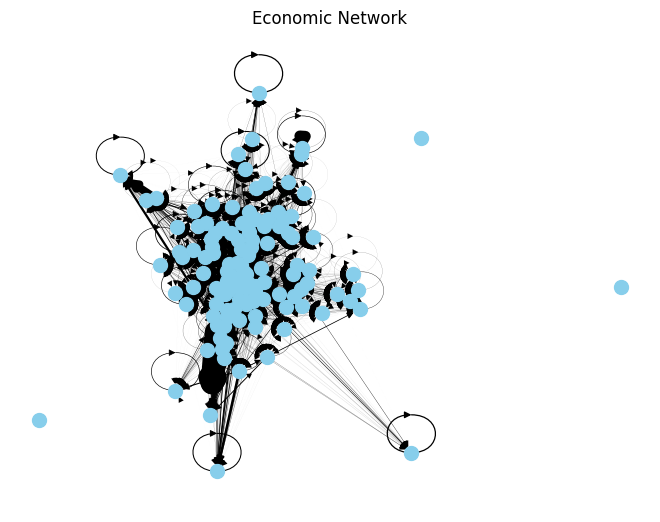

In [12]:
pos = nx.spring_layout(red_sectores)
edges = red_sectores.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(red_sectores, pos, with_labels=False, node_size=100, node_color="skyblue", font_size=10, font_weight="bold", width=weights)
plt.title("Red de Sectores Económicos")
plt.show()

## Análisis de grado

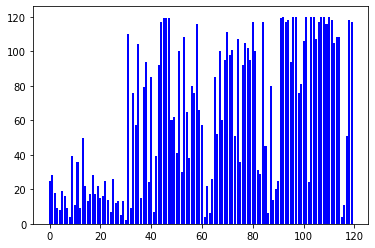

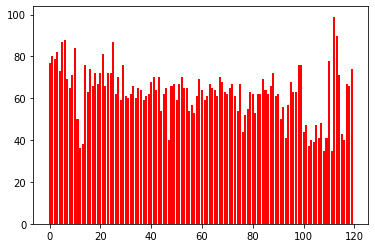

Media del Grado de salida:62.825
Desvio del Grado de salida:1850.2943750000002
Media del Grado de entrada:62.825
Desvio del Grado de entrada:152.894375


In [11]:
grados_in = red_sectores.in_degree
grados_out = red_sectores.out_degree
nodos= []
grado_salida = []
grado_entrada = []
for i in range(120):
    nodos.append(i)
    grado_salida.append(grados_out[i])
    grado_entrada.append(grados_in[i])
plt.bar(nodos, grado_salida, color ='blue')
plt.show()
plt.close()
plt.bar(nodos, grado_entrada, color ='red')
plt.show()
plt.close()


print(f'Media del Grado de salida:' + str(np.mean(grado_salida)))
print(f'Desvio del Grado de salida:' + str(np.var(grado_salida)))
print(f'Media del Grado de entrada:' + str(np.mean(grado_entrada)))
print(f'Desvio del Grado de entrada:' + str(np.var(grado_entrada)))


In [14]:

# Calculate In-Degree and Out-Degree
in_degrees = dict(red_sectores.in_degree())
out_degrees = dict(red_sectores.out_degree())
degrees = dict(red_sectores.degree())

plt.bar

# Calculate Weighted In-Degree and Out-Degree
weighted_in_degrees = dict(red_sectores.in_degree(weight='weight'))
weighted_out_degrees = dict(red_sectores.out_degree(weight='weight'))
weighted_degrees = dict(red_sectores.degree(weight='weight'))

# Print Degree Information
print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)
print("Total Degrees:", degrees)
print("Weighted In-Degrees:", weighted_in_degrees)
print("Weighted Out-Degrees:", weighted_out_degrees)
print("Weighted Total Degrees:", weighted_degrees)

#Armamos tablas con los datos:
cant_nodes = list(red_sectores.nodes)
degrees_table = [0] * 120

for i in cant_nodes:
    degrees_table[i] = [mip.index[i], in_degrees[i], out_degrees[i], degrees[i]]

head = ["Sector", "In-Degrees", "Out-Degrees", "Total Degrees"]

df = pd.DataFrame(degrees_table, columns=head)

df.sort_values(by=["In-Degrees"], ascending=False).tail(60)

In-Degrees: {0: 77, 1: 80, 2: 79, 3: 82, 4: 73, 5: 87, 6: 88, 7: 69, 8: 65, 9: 71, 10: 84, 11: 50, 12: 36, 13: 38, 14: 76, 15: 63, 16: 74, 17: 66, 18: 72, 19: 67, 20: 72, 21: 81, 22: 66, 23: 72, 24: 72, 25: 87, 26: 62, 27: 70, 28: 59, 29: 76, 30: 61, 31: 60, 32: 62, 33: 66, 34: 60, 35: 65, 36: 64, 37: 59, 38: 61, 39: 62, 40: 68, 41: 70, 42: 64, 43: 70, 44: 54, 45: 62, 46: 65, 47: 40, 48: 66, 49: 67, 50: 59, 51: 67, 52: 70, 53: 65, 54: 65, 55: 54, 56: 57, 57: 53, 58: 61, 59: 69, 60: 64, 61: 59, 62: 61, 63: 67, 64: 65, 65: 64, 66: 61, 67: 70, 68: 68, 69: 63, 70: 62, 71: 65, 72: 67, 73: 61, 74: 54, 75: 67, 76: 44, 77: 52, 78: 55, 79: 63, 80: 62, 81: 53, 82: 62, 83: 62, 84: 69, 85: 64, 86: 62, 87: 66, 88: 72, 89: 61, 90: 62, 91: 50, 92: 56, 93: 41, 94: 57, 95: 68, 96: 63, 97: 63, 98: 76, 99: 76, 100: 44, 101: 47, 102: 37, 103: 40, 104: 39, 105: 47, 106: 41, 107: 48, 108: 35, 109: 41, 110: 78, 111: 35, 112: 99, 113: 90, 114: 71, 115: 43, 116: 40, 117: 67, 118: 66, 119: 74}
Out-Degrees: {0: 

,Sector,In-Degrees,Out-Degrees,Total Degrees
60,Productos de cerámica refractaria y no refract...,64,57,121
42,Papel y cartón ondulado y envases de papel y c...,64,39,103
96,Comercio mayorista,63,120,183
97,Comercio minorista,63,120,183
69,Artículos de cuchillería y ferretería y herram...,63,95,158
79,Hilos y cables aislados,63,95,158
15,Elaboración y conservación de pescado y produc...,63,13,76
32,Acabado de productos textiles,62,9,71
39,Aserraderos,62,24,86
83,Receptores de radio y TV,62,29,91


In [15]:
df.sort_values(by=["Out-Degrees"], ascending=False).tail(60)

,Sector,In-Degrees,Out-Degrees,Total Degrees
68,"Forja, laminado y tratamiento de metales",68,60,128
60,Productos de cerámica refractaria y no refract...,64,57,121
34,Tejidos de punto,60,57,117
66,Fundición de metales,61,52,113
117,Actividad de asociaciones,67,51,118
73,Tractores y maquinaria agrícola,61,51,112
13,Extracción de otros minerales,38,50,88
85,Vehículos automotores,64,45,109
50,Materias primas plásticas y caucho sintético,59,41,100
9,Silvicultura y extracción de madera,71,39,110


## Comunidades 

In [24]:
G = nx.MultiDiGraph(red_sectores)
communities = nx.community.greedy_modularity_communities(G)

community_list = [list(community) for community in communities]
print("Comunidades:", community_list)
print("Cantidad de comunidades:", len(community_list))

Comunidades: [[13, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 97, 110], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 37, 42, 49, 52, 59, 89, 98, 99, 102, 112, 114, 116, 117, 120, 121, 122], [11, 12, 76, 93, 100, 101, 103, 104, 105, 106, 107, 44, 108, 109, 111, 51, 53, 119], [113], [115], [118]]
Cantidad de comunidades: 6


In [25]:
print(G[13])

{1: {0: {'weight': 8.002975846780002e-21}}, 10: {0: {'weight': 2.285440273103777e-21}}, 11: {0: {'weight': 1.7204775460882932e-22}}, 13: {0: {'weight': 9.94354594015567e-21}}, 14: {0: {'weight': 7.863088197735616e-24}}, 16: {0: {'weight': 1.0881390760020403e-19}}, 17: {0: {'weight': 3.938748156698626e-21}}, 19: {0: {'weight': 5.537819052518531e-22}}, 22: {0: {'weight': 4.362892264735196e-20}}, 25: {0: {'weight': 1.359841629912263e-22}}, 27: {0: {'weight': 1.525698429322787e-20}}, 28: {0: {'weight': 4.902869457427636e-19}}, 29: {0: {'weight': 4.067533090144422e-21}}, 32: {0: {'weight': 5.70329051901181e-20}}, 33: {0: {'weight': 5.773456866126953e-21}}, 40: {0: {'weight': 2.941496314675906e-23}}, 41: {0: {'weight': 5.38668370570805e-21}}, 48: {0: {'weight': 6.82812319535395e-21}}, 50: {0: {'weight': 1.0188747269175034e-24}}, 51: {0: {'weight': 1.1181563689561971e-20}}, 52: {0: {'weight': 7.516643377458644e-23}}, 53: {0: {'weight': 1.23259137281694e-20}}, 54: {0: {'weight': 2.318589363695

In [22]:
## Intento de visualización por Clusters
G = nx.MultiDiGraph(red_sectores)
communities = nx.community.greedy_modularity_communities(G)

supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=50, seed=429)

centers = list(superpos.values())
print(centers)
'''pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))
    
for nodes, clr in zip(communities, ("tab:blue", "tab:orange", "tab:green")):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=100)
nx.draw_networkx_edges(G, pos=pos)
'''
plt.tight_layout()
plt.show()

[array([-16.89327672, -41.32399419]), array([38.19869662, 29.56175695]), array([-45.73053835, -13.66758593]), array([45.89946998, -5.14519206]), array([49.11139265,  5.89947949]), array([-41.47226442,  28.34190971]), array([-46.92149384,   9.94761326]), array([41.05634919, 15.10380276]), array([-10.61593355, -40.86952113]), array([10.47270616, 45.30837799]), array([ 43.45562322, -28.45179058]), array([ 25.67680736, -38.82152502]), array([13.11621851, 46.13509552]), array([-43.6522669 ,  15.99530204]), array([ 11.67223387, -46.05577176]), array([-7.77252086, 48.52331108]), array([46.7879367 ,  9.62742268]), array([-35.02482688,  29.83422608]), array([-43.08075313, -18.21826342]), array([-26.41937144,  37.69021557]), array([-19.5599647 , -46.98329898]), array([-21.49127232, -42.40969628]), array([-43.38967539, -20.97276127]), array([ 27.52897779, -42.48385135]), array([-47.62062754,   5.92607714]), array([ -2.54589778, -47.52062498]), array([ 21.53391844, -38.26981171]), array([-44.20988

<Figure size 640x480 with 0 Axes>